<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/Dolly/Cox_Hazard_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping InternetService_No due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping OnlineSecurity_No internet service due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping OnlineBackup_No internet service due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping DeviceProtection_No internet service due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping TechSupport_No internet service due to high VIF: inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping StreamingTV_No internet service due to high VIF: inf
Dropping MonthlyCharges due to high VIF: 866.0896396659763
Dropping PhoneService_Yes due to high VIF: 19.69692883254467
Dropping TotalCharges due to high VIF: 9.356008164267902


<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -13884.66
         time fit was run = 2025-02-09 10:08:08 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
SeniorCitizen                         -0.07      0.93      0.06           -0.18            0.04                0.83                1.04
gender_Male                           -0.09      0.92      0.05           -0.18            0.01                0.84                1.01
Partner_Yes                           -0.52      0.60      0.06           -0.63           -0.41                0.54                0.66
Dependents_Yes                        -0.05      0.95      0.07           -0.19            0.08                0.83                1.08
MultipleLines_No phone service        -0.09      0.91      0.10           -0.29            0.10                0.75                1.11
MultipleLines_Yes                     -0.46      0.63      0.05           -0.56           -0.35                0.57                0.70
InternetService_Fiber optic            0.39      1.47      0.07            0.24            0.53                1.28                1.70
OnlineSecurity_Yes                    -0.65      0.52      0.07           -0.78           -0.52                0.46                0.59
OnlineBackup_Yes                      -0.65      0.52      0.05           -0.76           -0.55                0.47                0.58
DeviceProtection_Yes                  -0.32      0.72      0.05           -0.43           -0.22                0.65                0.81
TechSupport_Yes                       -0.41      0.66      0.07           -0.54           -0.28                0.58                0.75
StreamingTV_Yes                       -0.04      0.96      0.05           -0.15            0.07                0.86                1.07
StreamingMovies_No internet service   -1.10      0.33      0.12           -1.34           -0.86                0.26                0.42
StreamingMovies_Yes                   -0.13      0.87      0.05           -0.24           -0.03                0.79                0.97
Contract_One year                     -1.62      0.20      0.09           -1.79           -1.44                0.17                0.24
Contract_Two year                     -3.23      0.04      0.16           -3.56           -2.91                0.03                0.05
PaperlessBilling_Yes                   0.18      1.20      0.06            0.07            0.29                1.07                1.34
PaymentMethod_Credit card (automatic) -0.08      0.92      0.09           -0.26            0.09                0.77                1.10
PaymentMethod_Electronic check         0.59      1.80      0.07            0.45            0.73                1.56                2.07
PaymentMethod_Mailed check             0.57      1.76      0.09            0.39            0.74                1.48                2.09

                                       cmp to      z      p  -log2(p)
covariate                                                            
SeniorCitizen                            0.00  -1.27   0.21      2.28
gender_Male                              0.00  -1.84   0.07      3.94
Partner_Yes                              0.00  -9.39 <0.005     67.22
Dependents_Yes                           0.00  -0.79   0.43      1.22
MultipleLines_No phone service           0.00  -0.93   0.35      1.50
MultipleLines_Yes                        0.00  -8.60 <0.005     56.82
InternetService_Fiber optic              0.00   5.34 <0.005     23.34
OnlineSecuri

<Axes: xlabel='log(HR) (95% CI)'>

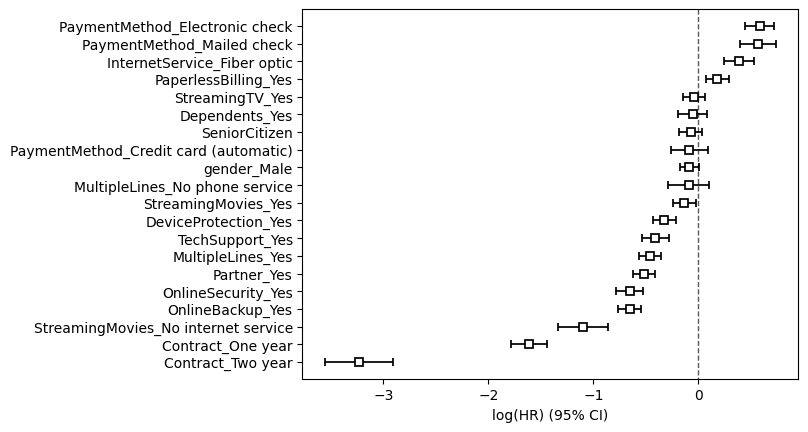

In [3]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Ensure column names are unique
df = df.loc[:, ~df.columns.duplicated()]

# Convert 'TotalCharges' to numeric (handle missing values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert 'Churn' column to binary (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert categorical variables into dummy variables
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop non-numeric and non-relevant columns
df = df.drop(columns=['customerID'])

# Drop missing values
df = df.dropna()

# Standardize continuous variables
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[continuous_cols] = (df[continuous_cols] - df[continuous_cols].mean()) / df[continuous_cols].std()

# ✅ Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# ✅ Drop rows with Inf or NaN values multiple times
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# ✅ Convert to float before applying VIF
df = df.astype(float)

# ✅ Check for any remaining object (non-numeric) columns and drop them
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print(f"Dropping non-numeric columns: {non_numeric_cols}")
df = df.drop(columns=non_numeric_cols)

# Function to remove multicollinear features using Variance Inflation Factor (VIF)
def remove_high_vif(data, threshold=5.0):
    """
    Removes columns with high Variance Inflation Factor (VIF).
    """
    dropped = True
    while dropped:
        dropped = False
        vif_data = pd.DataFrame()
        vif_data["Feature"] = data.columns
        vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

        max_vif = vif_data["VIF"].max()
        if max_vif > threshold:
            col_to_drop = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
            print(f"Dropping {col_to_drop} due to high VIF: {max_vif}")
            data = data.drop(columns=[col_to_drop])
            dropped = True  # Continue checking

    return data

# ✅ Drop 'Churn' column before computing VIF (it is the target variable)
X = df.drop(columns=['Churn'])

# ✅ Final NaN and dtype check before VIF computation
X = X.replace([np.inf, -np.inf], np.nan).dropna().astype(float)

# ✅ Run VIF computation on cleaned dataset
X = remove_high_vif(X)

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(X.assign(Churn=df['Churn']), duration_col='tenure', event_col='Churn')

# Print summary of the model
cph.print_summary()

# Plot the coefficients
cph.plot()

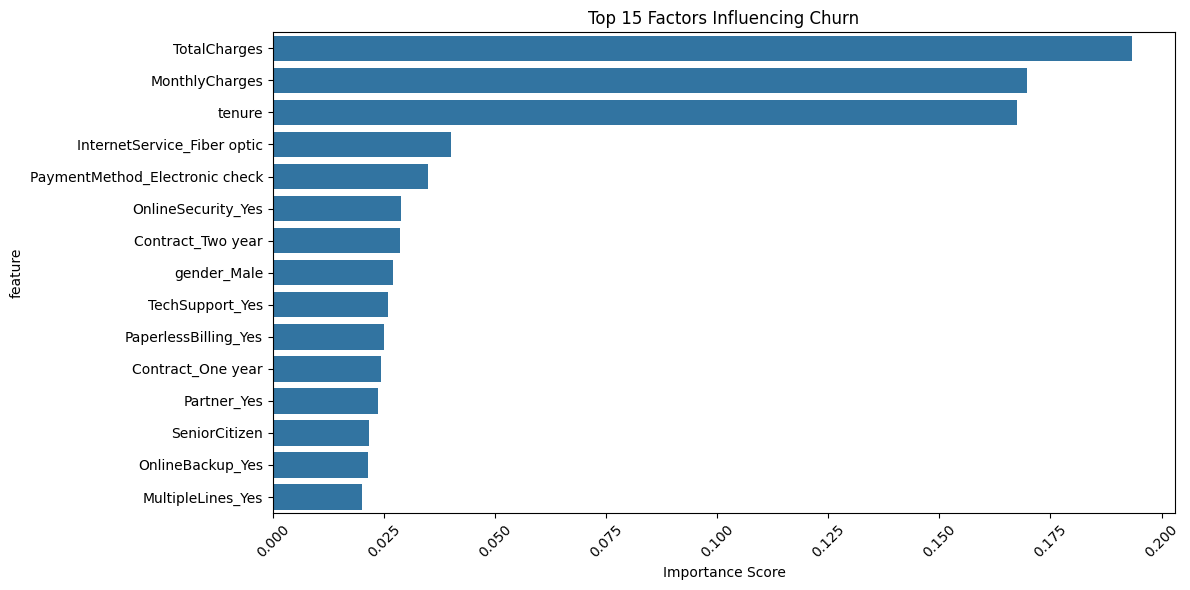

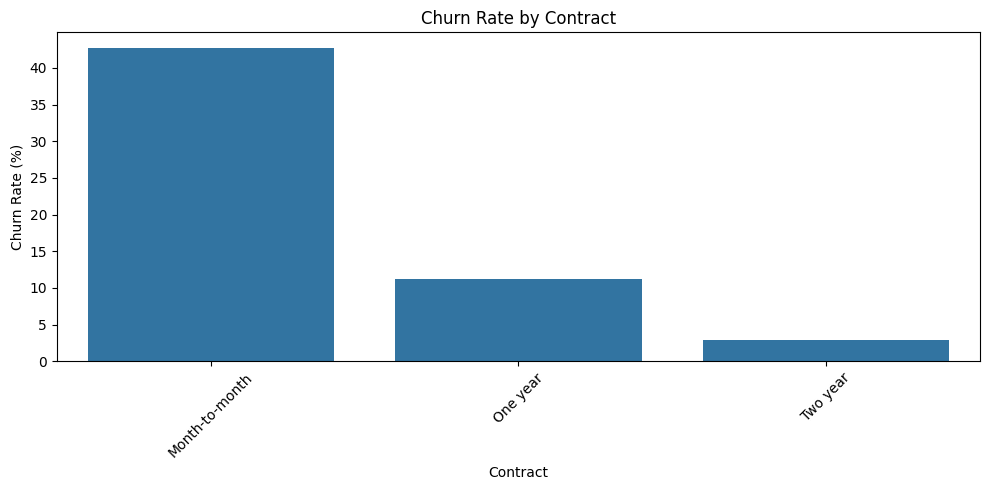

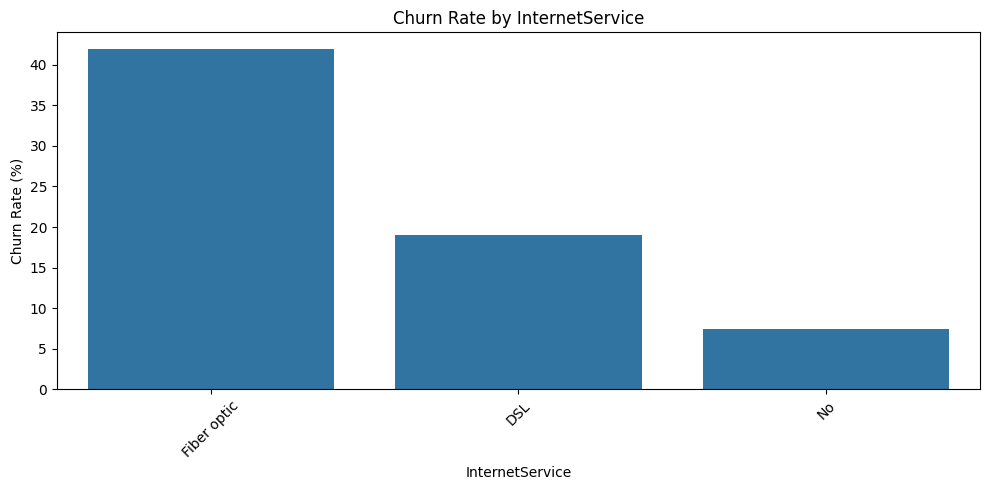

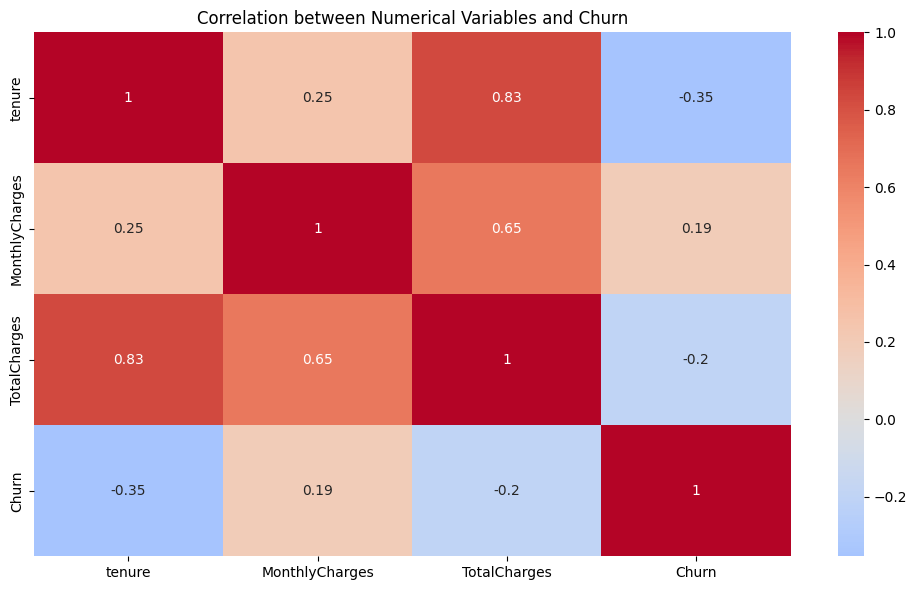


Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407


Top 10 Factors Increasing Churn:
                           feature  importance
3                     TotalCharges    0.193409
2                   MonthlyCharges    0.169758
1                           tenure    0.167572
10     InternetService_Fiber optic    0.039999
28  PaymentMethod_Electronic check    0.035016
13              OnlineSecurity_Yes    0.028905
25               Contract_Two year    0.028618
4                      gender_Male    0.026971
19                 TechSupport_Yes    0.025829
26            PaperlessBilling_Yes    0.025044


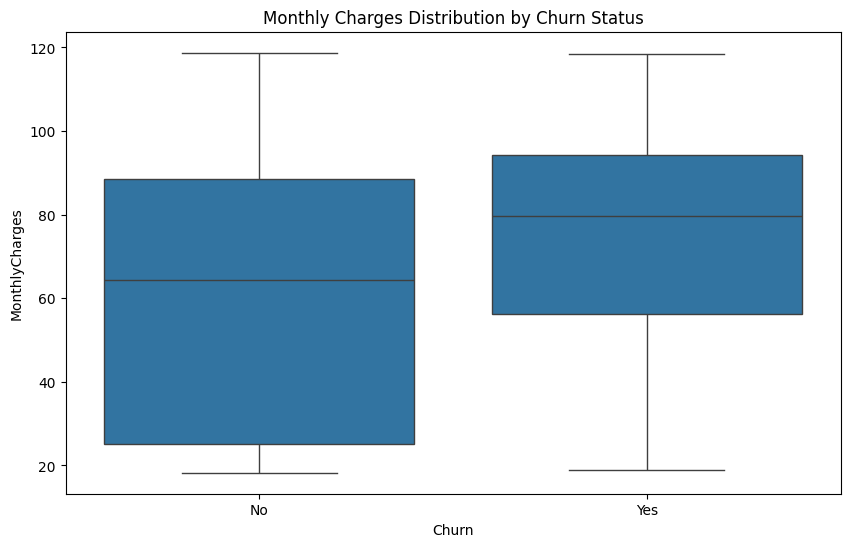


Churn Rate by Tenure Groups:
  tenure_group      Churn
0        0-25%  50.081389
1       25-50%  28.338192
2       50-75%  18.848168
3      75-100%   7.749288


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Read the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Preprocessing
# Convert TotalCharges to numeric, handling any spaces
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop customerID as it's not relevant for analysis
df = df.drop('customerID', axis=1)

# Handle missing values if any
df = df.dropna()

# Convert categorical variables to dummy variables
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop('Churn', axis=1)
y = (df_encoded['Churn'] == 'Yes').astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualization 1: Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Factors Influencing Churn')
plt.xlabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate churn rate by different factors
def plot_churn_rate(df, column):
    churn_rate = df.groupby(column)['Churn'].apply(
        lambda x: (x == 'Yes').mean() * 100
    ).reset_index()
    churn_rate = churn_rate.sort_values('Churn', ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=churn_rate, x=column, y='Churn')
    plt.title(f'Churn Rate by {column}')
    plt.ylabel('Churn Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualization 2: Churn Rate by Contract Type
plot_churn_rate(df, 'Contract')

# Visualization 3: Churn Rate by Internet Service
plot_churn_rate(df, 'InternetService')

# Visualization 4: Correlation between numerical variables and churn
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df[numerical_vars + ['Churn']].copy()
df_num['Churn'] = (df_num['Churn'] == 'Yes').astype(int)

plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Numerical Variables and Churn')
plt.tight_layout()
plt.show()

# Print model performance
print("\nModel Performance:")
y_pred = rf_model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print top 10 factors increasing churn
print("\nTop 10 Factors Increasing Churn:")
print(feature_importance.head(10))

# Additional Analysis: Monthly Charges Distribution by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

# Calculate and print average churn rate by tenure groups
df['tenure_group'] = pd.qcut(df['tenure'], q=4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])
tenure_churn = df.groupby('tenure_group')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
print("\nChurn Rate by Tenure Groups:")
print(tenure_churn)

In [2]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=4a1d929c9e87517d0c8d590de4b56608ef0c547e072ecd2477e28c761df2d76a
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
